In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import utils

In [2]:
y = utils.read_pickles('../data/label').TARGET

100%|██████████| 20/20 [00:00<00:00, 1251.64it/s]


In [3]:
y.mean()

0.08072881945686496

In [4]:
test = utils.load_test()

100%|██████████| 20/20 [00:00<00:00, 170.15it/s]


In [5]:
test.shape

(48744, 249)

In [6]:
48744 * y.mean()

3935.0455756054253

In [7]:
n = 3935

In [8]:
y_test = [1] * n + [0] * (test.shape[0]-n)

In [9]:
len(y_test)

48744

In [10]:
public_size = int(len(y_test) * 0.2)
public_size

9748

In [22]:
li_sum = [np.sum(np.random.choice(y_test, replace=False, size=public_size)) for i in tqdm(range(5999))]

100%|██████████| 5999/5999 [00:21<00:00, 284.95it/s]


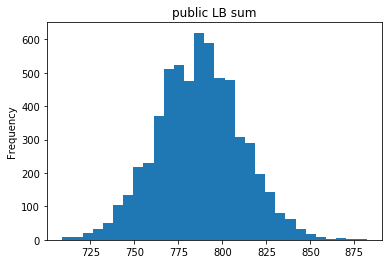

In [23]:
pd.Series(li_sum).plot(kind='hist', bins=30)
plt.title('public LB sum')
plt.show()

In [21]:
li_mean = [np.mean(np.random.choice(y_test, replace=False, size=public_size)) for i in tqdm(range(5999))]

100%|██████████| 5999/5999 [00:21<00:00, 284.26it/s]


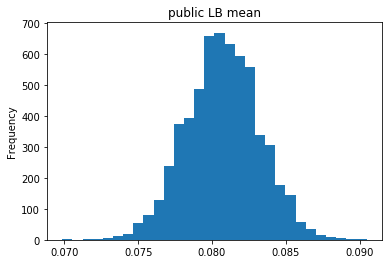

In [24]:
pd.Series(li_mean).plot(kind='hist', bins=30)
plt.title('public LB mean')
plt.show()

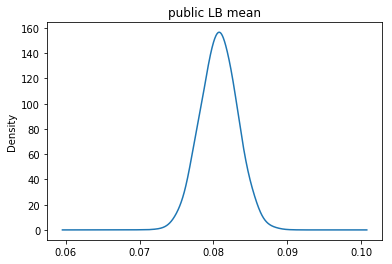

In [27]:
pd.Series(li_mean).plot(kind='kde', bw_method=0.3)
plt.title('public LB mean')
plt.show()

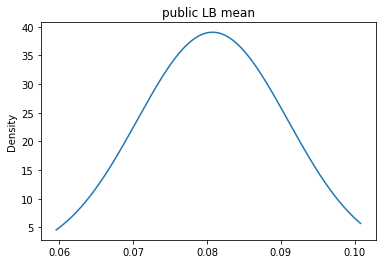

In [31]:
pd.Series(li_mean).plot(kind='kde', bw_method=4)
plt.title('public LB mean')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train = utils.load_train()

100%|██████████| 20/20 [00:05<00:00,  3.51it/s]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, y, stratify=y, random_state=1,  test_size=0.2)

In [37]:
y_train.mean(), y_test.mean()

(0.08072908198107379, 0.08072776937710356)